# SCIPY & MATPLOTLIB - Assignment 
## By Prakash Ghosh
----

### Scipy:
* We have the min and max temperatures in a city In India for each months of the year.
* We would like to find a function to describe this and show it graphically, the dataset given below.
* Task:
*   1. fitting it to the periodic function
*   2. plot the fit
* Data
* Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
* Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg 
from scipy import optimize 

In [2]:
# Array to store Min and Max Temperature for each months of the year
temp_max=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [3]:
#Settings for Month Name
lst_mm =list(range(1,13))
lst_mon=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

### 1. Fitting it to the periodic function and Printing the Plot

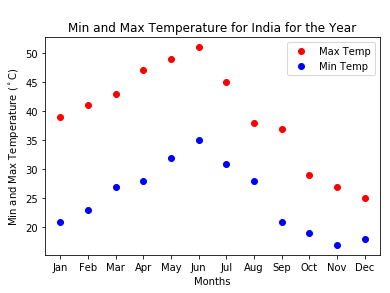

In [7]:
# Fitting it to the periodic function 
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, lst_mm, temp_max, [50,40,30])
res_min, cov_min = optimize.curve_fit(yearly_temps, lst_mm, temp_min, [20,30,40])

# Printing the Plot
plt.plot(lst_mm,temp_max,'ro',label='Max Temp')
plt.plot(lst_mm,temp_min,'bo',label='Min Temp')
plt.xticks(lst_mm,lst_mon)
plt.xlabel('Months')
plt.ylabel('Min and Max Temperature ($^\circ$C)')
plt.title('\nMin and Max Temperature for India for the Year')
plt.legend()
plt.show()

### 2. Plot the fit

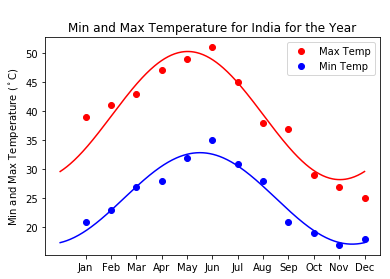

In [8]:
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(lst_mm, temp_max, 'ro',label='Max Temp')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(lst_mm, temp_min, 'bo', label='Min Temp')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xticks(lst_mm,lst_mon)
plt.ylabel('Min and Max Temperature ($^\circ$C)')
plt.title('\nMin and Max Temperature for India for the Year')
plt.legend()
plt.show()

---
### Matplotlib:
* This assignment is for visualization using matplotlib:
* data to use: url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
* titanic = pd.read_csv(url)
* Charts to plot:
*     1. Create a pie chart presenting the male/female proportion
*     2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg 
from scipy import optimize 

In [10]:
#Read Data
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic_df = pd.read_csv(url)
titanic_df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


---- 
### 1. Create a pie chart presenting the male/female proportion 

Male Count:	 843
Female Count:	 466


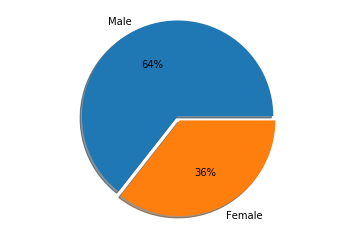

In [22]:
#Derive male and Female Count
MaleCount=titanic_df.loc[(titanic_df.sex=='male')].sex.count()
FeMaleCount=titanic_df.loc[(titanic_df.sex=='female')].sex.count()

print('Male Count:\t',MaleCount)
print('Female Count:\t',FeMaleCount)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Male', 'Female']
sizes = [MaleCount, FeMaleCount]
explode = (0.05,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

#a pie chart presenting the male/female proportion
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels,explode=explode, autopct='%1.0f%%',shadow=True, startangle=0)
ax1.axis('equal')  # Equal for pie is circle.
plt.show()

---
### Problem 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

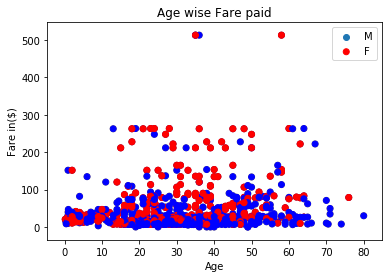

In [11]:
# Delete Null Rows for sex
titanic_df = titanic_df.dropna(subset=['sex'])

Age=titanic_df.age
Fare=titanic_df.fare
Sex=pd.factorize(titanic_df['sex'])[0]
plt.scatter(Age,Fare,c=Sex)

Sex=titanic_df['sex'].map({'male' : 'blue', 'female' : 'red'})

plt.title('Age wise Fare paid')
plt.xlabel('Age')
plt.ylabel('Fare in($)')
plt.scatter(Age,Fare,c=Sex)
plt.legend('MF')
plt.show()